# LAB02 Assigment




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt


# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
row,cul = data.shape
row*cul

633108

In [3]:
# The number of individuals making more than $50000 annually
indiv_1 = data[data['income']=='>50K'].shape[0]
print(indiv_1)

11208


In [4]:
# The number of individuals making at most $50000 annually
indiv_2 = data[data['income']=='<=50K'].shape[0]
print(indiv_2)

34014


In [5]:
# The percentage of individuals making at more than $50000 annually
indiv_1/(indiv_2+indiv_1)*100

24.78439697492371

### Exercise 2 Preprocessing 

In [6]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

<Axes: xlabel='hours-per-week', ylabel='Density'>

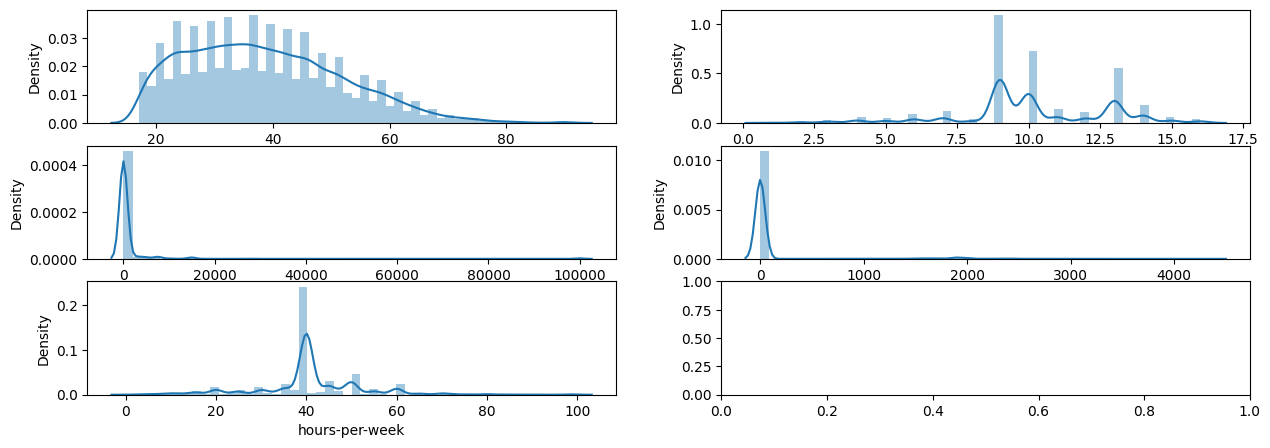

In [7]:
# Visualize skewed continuous features of original data

data['age'] = data['age'].astype('float64')

fig, axes = plt.subplots(3,2, figsize=(15,5))
sns.distplot(data['age'], ax=axes[0][0])
sns.distplot(data['education-num'], ax=axes[0][1])
sns.distplot(data['capital-gain'], ax=axes[1][0])
sns.distplot(data['capital-loss'], ax=axes[1][1])
sns.distplot(data['hours-per-week'], ax=axes[2][0])


In [8]:
# Outliers Treatment with log method

data1 = data.copy()

data1['Log_age'] = np.log(data1['age'])
data1['Log_education-num'] = np.log(data1['education-num'])
data1['Log_hours-per-week'] = np.log(data1['hours-per-week'])

data1.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Log_age,Log_education-num,Log_hours-per-week
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,3.663562,2.564949,3.688879
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,3.912023,2.564949,2.564949
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,3.637586,2.197225,3.688879
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,3.970292,1.945910,3.688879
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,3.332205,2.564949,3.688879


<Axes: xlabel='Log_hours-per-week', ylabel='Density'>

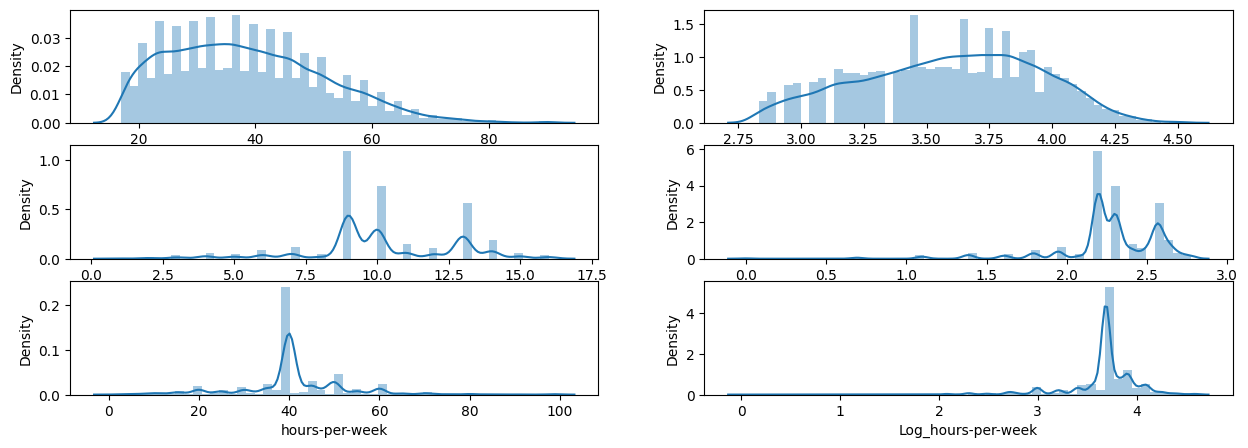

In [9]:
fig, axes = plt.subplots(3,2, figsize=(15,5))
sns.distplot(data1['age'], ax=axes[0][0])
sns.distplot(data1['education-num'], ax=axes[1][0])
sns.distplot(data1['hours-per-week'], ax=axes[2][0])

sns.distplot(data1['Log_age'], ax=axes[0][1])
sns.distplot(data1['Log_education-num'], ax=axes[1][1])
sns.distplot(data1['Log_hours-per-week'], ax=axes[2][1])

In [10]:
data1.dtypes

age                   float64
workclass              object
education_level        object
education-num         float64
marital-status         object
occupation             object
relationship           object
race                   object
sex                    object
capital-gain          float64
capital-loss          float64
hours-per-week        float64
native-country         object
income                 object
Log_age               float64
Log_education-num     float64
Log_hours-per-week    float64
dtype: object

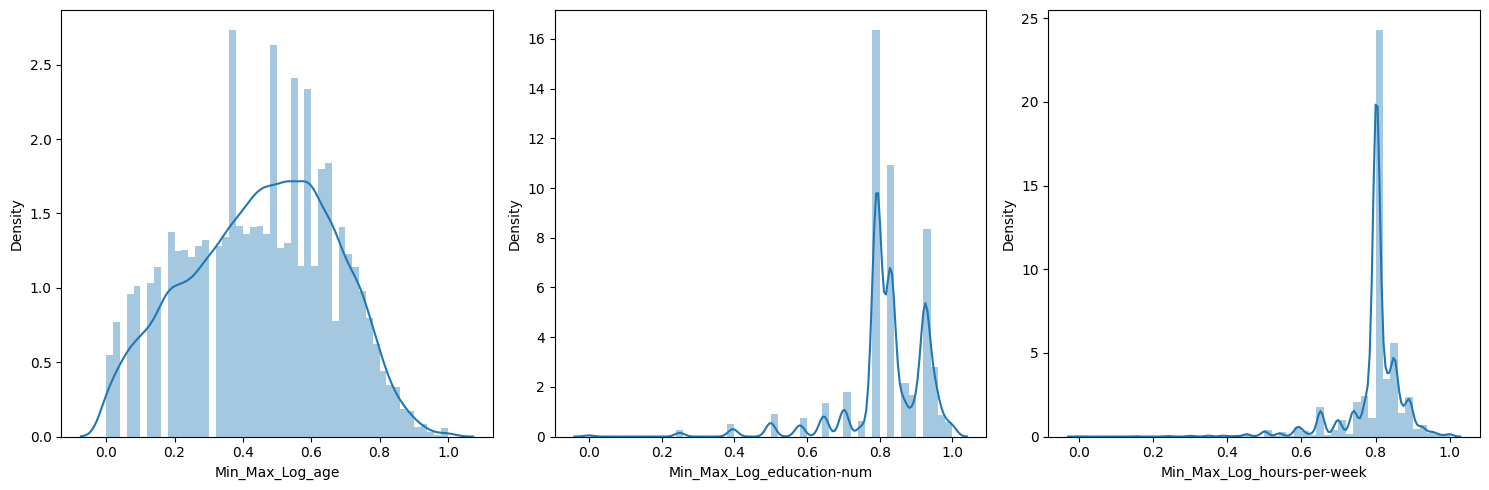

,age,education-num,capital-gain,capital-loss,hours-per-week,income,Log_age,Log_education-num,Log_hours-per-week,Min_Max_Log_age,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39.0,13.0,2174.0,0.0,40.0,<=50K,3.663562,2.564949,3.688879,0.498230,...,False,False,False,False,False,False,False,True,False,False
1,50.0,13.0,0.0,0.0,13.0,<=50K,3.912023,2.564949,2.564949,0.647313,...,False,False,False,False,False,False,False,True,False,False
2,38.0,9.0,0.0,0.0,40.0,<=50K,3.637586,2.197225,3.688879,0.482644,...,False,False,False,False,False,False,False,True,False,False
3,53.0,7.0,0.0,0.0,40.0,<=50K,3.970292,1.945910,3.688879,0.682276,...,False,False,False,False,False,False,False,True,False,False
4,28.0,13.0,0.0,0.0,40.0,<=50K,3.332205,2.564949,3.688879,0.299407,...,False,False,False,False,False,False,False,False,False,False
5,37.0,14.0,0.0,0.0,40.0,<=50K,3.610918,2.639057,3.688879,0.466642,...,False,False,False,False,False,False,False,True,False,False
6,49.0,5.0,0.0,0.0,16.0,<=50K,3.891820,1.609438,2.772589,0.635191,...,False,False,False,False,False,False,False,False,False,False
7,52.0,9.0,0.0,0.0,45.0,>50K,3.951244,2.197225,3.806662,0.670847,...,False,False,False,False,False,False,False,True,False,False
8,31.0,14.0,14084.0,0.0,50.0,>50K,3.433987,2.639057,3.912023,0.360480,...,False,False,False,False,False,False,False,True,False,False
9,42.0,13.0,5178.0,0.0,40.0,>50K,3.737670,2.564949,3.688879,0.542697,...,False,False,False,False,False,False,False,True,False,False


In [11]:
# Data Transformation
## scaleing
from sklearn.preprocessing import MinMaxScaler
modle = MinMaxScaler()
numeral = ['Log_age','Log_education-num','Log_hours-per-week']
Min_Max_numeral = ['Min_Max_Log_age','Min_Max_Log_education-num','Min_Max_Log_hours-per-week']
data1[Min_Max_numeral] = modle.fit_transform(data1[numeral])

fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.distplot(data1['Min_Max_Log_age'], ax=axes[0])
sns.distplot(data1['Min_Max_Log_education-num'], ax=axes[1])
sns.distplot(data1['Min_Max_Log_hours-per-week'], ax=axes[2])

plt.tight_layout()
plt.show()


# Perform one-hot encoding on the data
data2 = data1.copy()
categorical = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
data2 = pd.get_dummies(data2,columns=categorical,drop_first=True)
data2.head(10)



### Exercise 3 Shuffle and Split Data

In [12]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
data2['income'].replace(('<=50K','>50K'),(0,1),inplace=True)
Y = data2['income']
X = data2.drop('income',axis=1)

## Splitting dataset into 80% Training and 20% Testing Data:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state =0)
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (36177, 101)
The shape of X_test is: (9045, 101)

The shape of y_train is: (36177,)
The shape of y_test is: (9045,)


### Exercise 4 A simple Model
Now we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to 'accuracy' and 'f-score' to be used later.


In [13]:
print(y_test.shape)

(9045,)


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
subarray = np.array([1, 0])
y_pred = np.tile(subarray, (9045, 1)) # all prediction is >50K

threshold = 0.8
y_pred_class = y_pred[:, 1]   > threshold
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
# accuracy = (tp + tn) / (tp + fp + fn + tn)

print("accuracy:", accuracy_score(y_test, y_pred_class))

accuracy: 0.7562189054726368


In [15]:
from sklearn.metrics import f1_score
print("f-score:", f1_score(y_test, y_pred_class, average='macro'))

f-score: 0.43059490084985835


### Exercise 5 Evaluating Model 
Now if we assume a model that predicts any individual's income more than \$50,000, then what would be that model's accuracy and F-score on this dataset? You can use the code provided in the previous section.
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression

You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [16]:
# Evaluating Model
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

logistic_y_prediction = logistic_model.predict(X_test) 
print('Logistic Regression accuracy = ', metrics.accuracy_score(logistic_y_prediction,y_test))

logistic_y_pred = logistic_model.predict_proba(X_test)
logistic_y_pred_class = logistic_y_pred[:, 1]   > 0.8
print("Logistic Regression f-score:", f1_score(y_test, logistic_y_pred_class, average='macro'))

Logistic Regression accuracy =  0.8404643449419569
Logistic Regression f-score: 0.6295462691333573


In [17]:
## Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

trees_model = DecisionTreeClassifier()
trees_model.fit(X_train,y_train) 

trees_y_prediction = trees_model.predict(X_test) 
print('Decision Tree accuracy = ', metrics.accuracy_score(trees_y_prediction,y_test))

trees_y_pred = trees_model.predict_proba(X_test)
trees_y_pred_class = trees_y_pred[:, 1]   > 0.8
print("Decision Trees f-score:", f1_score(y_test, trees_y_pred_class, average='macro'))

Decision Tree accuracy =  0.8176893311221669
Decision Trees f-score: 0.7444237472658


In [18]:
## GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train) 

GNB_y_prediction = GNB_model.predict(X_test) 
print('GaussianNB accuracy = ', metrics.accuracy_score(GNB_y_prediction,y_test))

GNB_y_pred = GNB_model.predict_proba(X_test)
GNB_y_pred_class = GNB_y_pred[:, 1]   > 0.8
print("GaussianNB f-score:", f1_score(y_test, GNB_y_pred_class, average='macro'))

GaussianNB accuracy =  0.8129353233830846
GaussianNB f-score: 0.7754191762850428


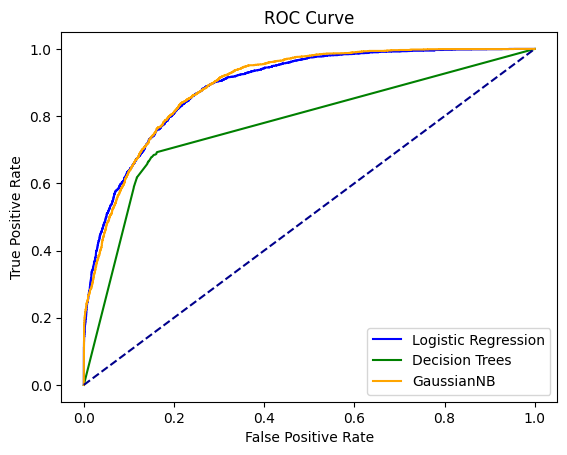

In [19]:
logistic_y_pred = logistic_model.predict_proba(X_test)
logistic_fper, logistic_tper, logistic_thresholds = metrics.roc_curve(y_test, logistic_y_pred[:, 1]) 
plt.plot(logistic_fper, logistic_tper, color='blue', label='Logistic Regression')

trees_y_pred = trees_model.predict_proba(X_test)
trees_fper, trees_tper, trees_thresholds = metrics.roc_curve(y_test, trees_y_pred[:, 1]) 
plt.plot(trees_fper, trees_tper, color='green', label='Decision Trees')

GNB_y_pred = GNB_model.predict_proba(X_test)
GNB_fper, GNB_tper, GNB_thresholds = metrics.roc_curve(y_test, GNB_y_pred[:, 1]) 
plt.plot(GNB_fper, GNB_tper, color='orange', label='GaussianNB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Exercise 6 Questions
(1) An important task when performing supervised learning on a dataset like the census data we study here is determining which features provides the most predictive power. Choose a scikit-learn classifier (e.g adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. List two supervised learning models that apply to this problem, and you will test them on census data and plot the following graph.

<center>
    <img src='images/importance-ranking.png' style="zoom:50%;"/>
    
</center>

<BarContainer object of 101 artists>

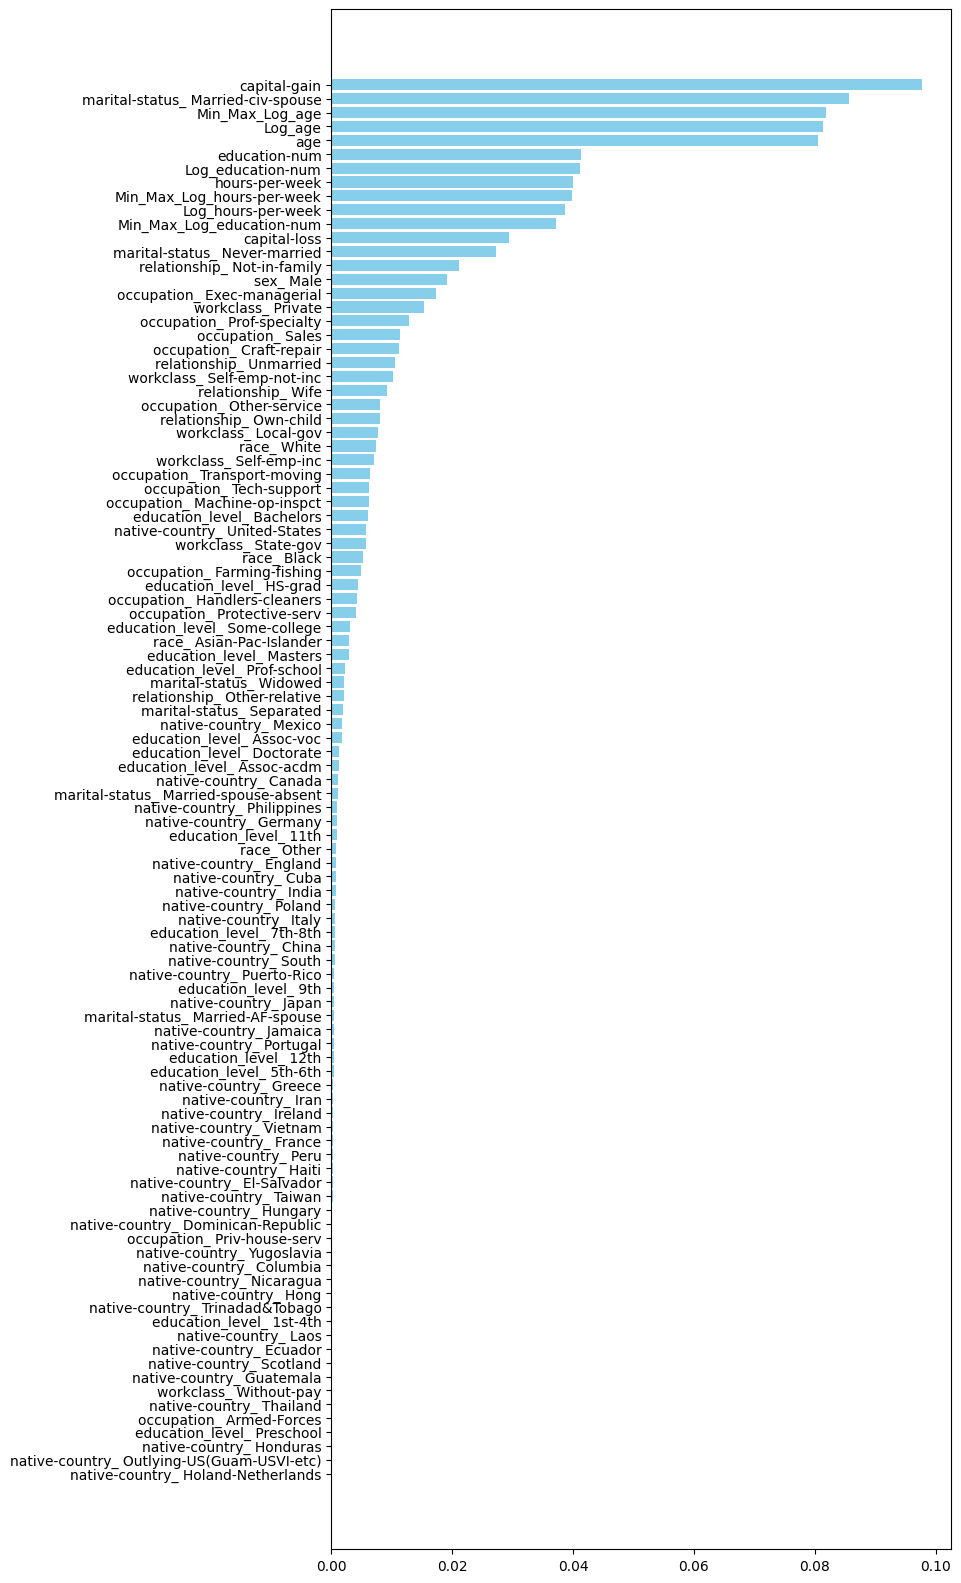

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

# print(feature_importance.shape)
# print(X_train.columns)